Project

Students selected for the Spring 2024 Data Science Bootcamp will have the opportunity to work on a real-world project to apply the skills and knowledge gained during the bootcamp.

Projects are required as part of student participation in the Data Science bootcamp. Students may work with each other in groups of 4-5 students to complete the project and create their groups by Friday, March 8 @ 11:59PM.

Project groups will conduct their mid program presentations with industry professionals for 10 minutes (presentation and project judge Q&A) on either April 2 or April 4 (whichever date corresponds with your teaching section) in order to receive feedback and make revisions for final project presentations

Groups will conduct their final project presentations with industry professionals for 10 minutes (presentation and project judge Q&A) the week of April 30 or May 2 (whichever date corresponds with your teaching section). Prizes will be awarded to the winning group.

Students are encouraged to utilize weekly individual review time and participate in Slack discussions to communicate with the instructor about their project progress, ideas, or questions regularly.

Project Judging Criteria

Projects will be judged on the following criteria and prizes will be awarded to the top performing projects:

Using 1 (lowest)-3 (highest)

Project Design: How was the project designed and did students ask questions that helped move the project forward proactively? 1: Project not designed well; yields no tangible results or applicability 2: Project designed to move forward, but disjointed approach 3: Project designed to move forward in systematic way

Addressing Stated Problem: How well does the project solve the stated problem? 1: Results did not address stated problem at all 2: Results include missing details and inconclusive results 3: Results solves stated problem at face value

Presentation and Demo: How was the presentation? 1: Project presentation lacked any sort of depth and clarity, student(s) presenting did not clearly address issues from prompt 2: Project presentation included little detail and inconclusive results, difficult to understand 3: Project presentation addresses challenges stated in prompt clearly and concisely, easy for audience to follow and understand

Project description(s): Please select one to work on:

Analyzing NYC Airbnb Open Data Dataset :NYC Airbnb Data

This project is designed to provide students with hands-on experience with the aim of extracting meaningful insights from the NYC Airbnb Open Data. The dataset includes detailed information about Airbnb listings in New York City, covering host details, geographical availability, and essential metrics.

Problem Statement: Your goal is to conduct a comprehensive analysis of the NYC Airbnb dataset and derive actionable insights for hosts and potential renters. The dataset offers an opportunity to address various problem statements, and one possible focus is predicting rental prices based on relevant features. Additionally, students are encouraged to explore different models and analysis approaches, such as treating it as a regression problem or a classification problem to predict different levels of demand.

Tasks: Explore the dataset to understand the distribution of features and identify patterns. Examine host details, geographical availability, and rental metrics. Select relevant features for the predictive model, considering host characteristics, listing details, and geographical factors. Formulate the problem statement as predicting rental prices based on the chosen features. Experiment with different machine learning models, considering regression or classification approaches. Train the predictive models and evaluate their performance using suitable metrics. Analyze the significance of different features in predicting rental prices. Students are also encouraged to formulate hypotheses related to factors influencing rental prices or demand and conduct hypothesis testing to validate or refute these hypotheses. Create visualizations to support findings and enhance the interpretability of the predictive model. Summarize results, including key insights, challenges faced, and potential areas for improvement.

Suggested Timeline : Week 1: Project introduction and Dataset Exploration Team formation (4-5 students). Introduction to the project, objectives, and NYC Airbnb dataset. Dataset acquisition and initial exploration.

Week 2: Feature Exploration Data manipulation using Numpy and Pandas. Exploring the dataset. Week 3-4: EDA & Visualization Data manipulation using Numpy and Pandas. Exploring EDA and visualization techniques. Select relevant features and formulate the problem statement. Week 5: Mid-Program Presentation Present progress achieved till the EDA stage. Receiving feedback and suggestions for further analysis. Week 6: Initial Modeling Begin experimenting with different ML models(Regression/Classification approach). Train Initial model and evaluate performance. Week 7: Hypothesis Testing Formulate hypothesis related to factors influencing rental prices. Conduct hypothesis testing and statistical analysis. Week 8: Final Model Training and Interpretation Train final predictive models incorporating insights from previous analysis. Interpret results, summarize key insights Week 9: Final Presentation Present methodology, results and insights

Hypothesis:

SIZE LOCATION SEASON —> PRICE

PRICE LOCATION —> Availability

Review —> Availability

Holiday season rents will be more expensive due to high demand
The larger the apts size, the more pricy it is
On average manhattan apts price will be more expensive than other boroughs
The busier the neighborhood, the pricer the apts price
The neighborhood have better public transportaions has higher price
The more reviews the apts has, the less availability apt has
The cheaper the apt is for the location, the less availability apt has
the more listings(calculated_host_listings_count) the host has, the less availabilty he has (due to he is more experienced)
The longer characters the airbnb name has, the more availability there is
entire home/apt has less availability than private room
Goal:

predicting rental prices based on relevant features.

How to use area (locations) to predict apartment pricings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
print(df.shape)
df.info()

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

In [ ]:
df.sort_values(by = "price", ascending = False).head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0


In [ ]:
Total_listings = df.host_id.value_counts().count()
Total_listings

37457

                               Visualising Categorical Features:                                


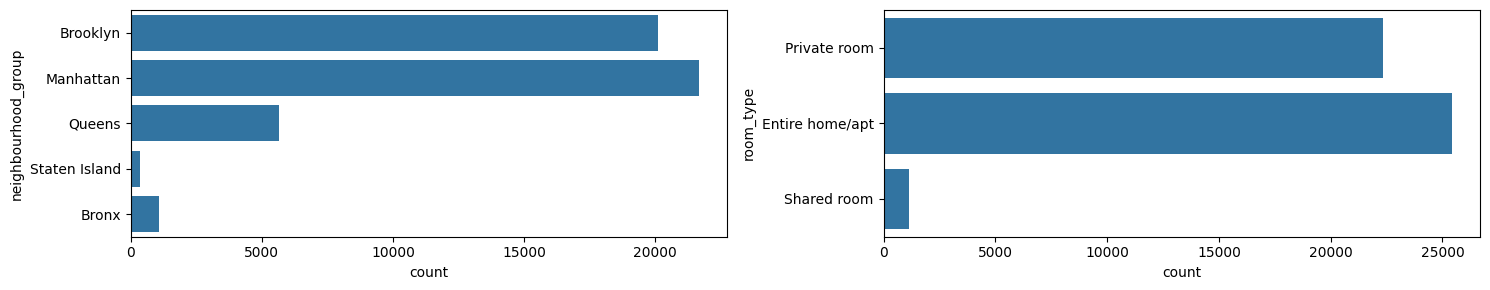

In [ ]:
# Define categorical features you want to visualize
categorical_features = ['neighbourhood_group', 'room_type']

# Printing the title 'Visualising Categorical Features'
print('\033[1mVisualising Categorical Features:'.center(100))

# Setting the number of plots per row
n = 2  # Since you want to visualize 2 categorical features
plt.figure(figsize=[15, 3*math.ceil(len(categorical_features)/n)])

# Looping through the list of categorical features
for i in range(len(categorical_features)):
    plt.subplot(math.ceil(len(categorical_features)/n), n, i+1)
    sns.countplot(df[categorical_features[i]])

plt.tight_layout()
plt.show()

In [ ]:
# Identifying missing data
missing_data = df.isnull()

# Summarizing missing data by column
missing_summary = df.isnull().sum()

# Display the summary of missing data
print(missing_summary)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Finding rows where any column has missing data
rows_with_missing_data = df[df.isnull().any(axis=1)]

# Displaying the rows with missing data
print(rows_with_missing_data)

# Finding rows where 'name' has missing data
rows_with_missing_in_name = df[df['name'].isnull()]

# Displaying the rows with missing data in 'name'
print(rows_with_missing_in_name)

# Finding rows where 'host_name' has missing data
rows_with_missing_in_host_name = df[df['host_name'].isnull()]

# Displaying the rows with missing data in 'host_name'
print(rows_with_missing_in_host_name)

             id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_gr

In [ ]:
# Replace null values
df_filled = df.fillna({'name': 'unknown', 'host_name': 'unknown','reviews_per_month':0},inplace=True)
df['last_review'].fillna(method='ffill', inplace=True)

In [ ]:
# Summarizing missing data by column
missing_summary = df.isnull().sum()

# Display the summary of missing data
print(missing_summary)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


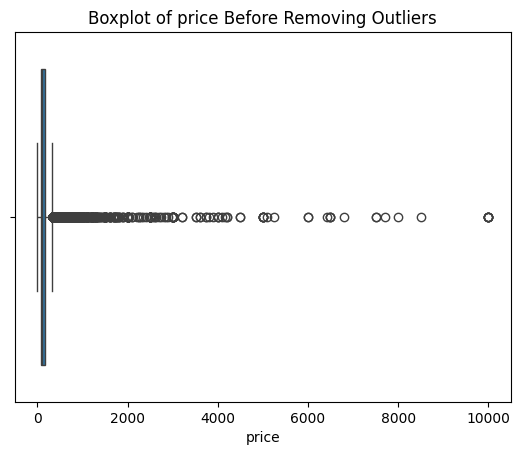

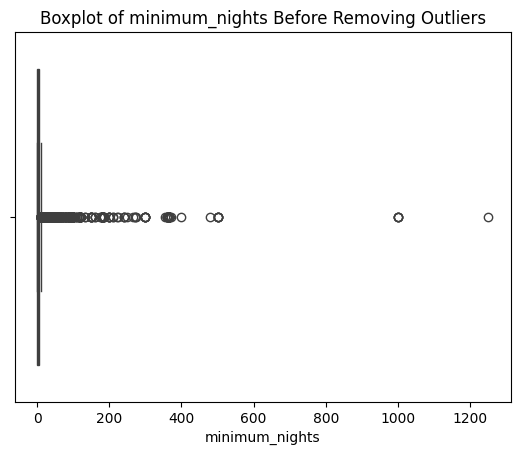

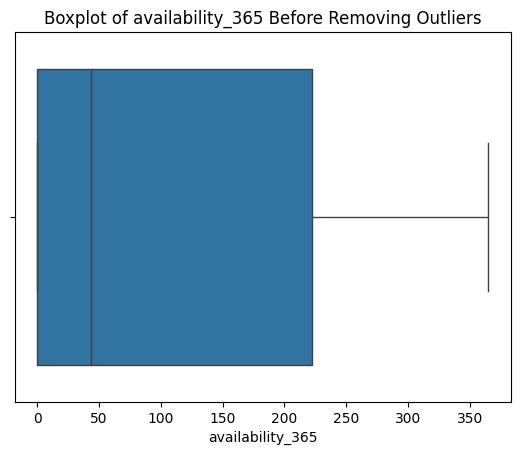

Original data size: 48895 rows
New data size after outlier removal: 47542 rows
Number of rows removed: 1353


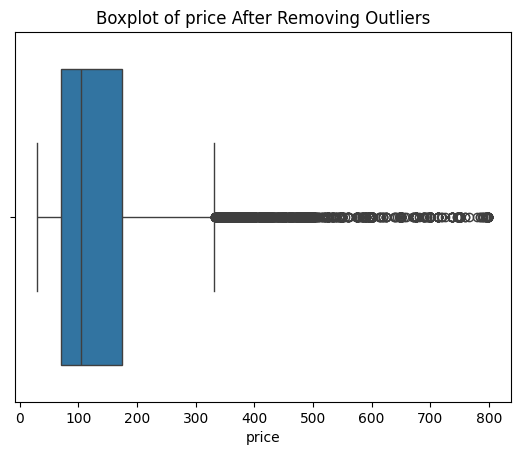

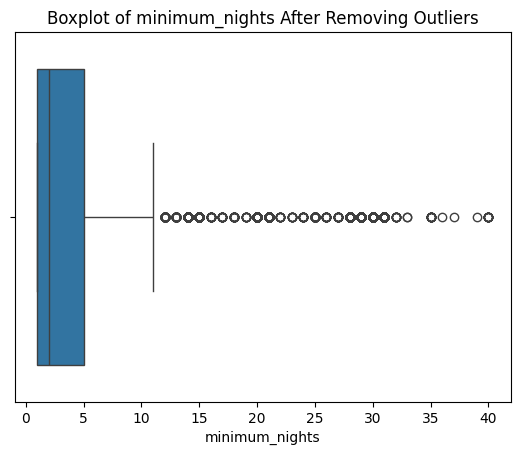

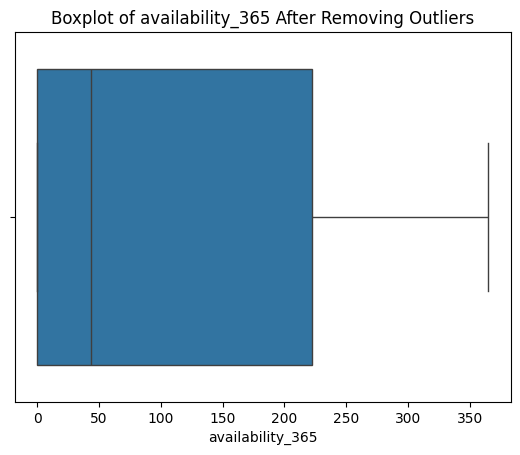

In [ ]:
# Store the original data size
original_data_size = df.shape[0]

# Correcting column names for consistent access
df.columns = df.columns.str.strip()

# Define a function to visualize outliers
def visualize_outliers(df, column_name):
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name} Before Removing Outliers')
    plt.show()

# Define a function to remove outliers using Quantile-Based Outlier Removal
def remove_outliers_quantile(df, column_name, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)

    # Filtering out the outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered



# Visualize and remove outliers for specific columns
columns_to_check = ['price', 'minimum_nights','availability_365']
for column in columns_to_check:
    visualize_outliers(df, column)
    df = remove_outliers_quantile(df, column)

# Store the new data size after outlier removal
new_data_size = df.shape[0]

# Displaying the shape of the DataFrame before and after outlier removal
print(f"Original data size: {original_data_size} rows")
print(f"New data size after outlier removal: {new_data_size} rows")
print(f"Number of rows removed: {original_data_size - new_data_size}")


for column in columns_to_check:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} After Removing Outliers')
    plt.show()

In [ ]:
df.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])

,mean,min,max
neighbourhood_group,,,
Bronx,87.116552,30,680
Brooklyn,116.907502,30,795
Manhattan,173.469479,30,799
Queens,95.247923,30,750
Staten Island,95.991643,30,700


In [ ]:
# The price of the data are set as 0 and 1,0000 per night that is out of the reasonable range, so we use Interquartile Range (IQR) Method to remove the outliers for price range
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

 #Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 #Remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])

df_no_outliers1 =  df_no_outliers

In [ ]:
original_data_size = df.shape[0]  # Number of rows in the original DataFrame
new_data_size = df_no_outliers.shape[0]  # Number of rows in the DataFrame after removing outliers

 #Print the sizes to compare
print(f"Original data size: {original_data_size} rows")
print(f"New data size: {new_data_size} rows")
print(f"Number of rows removed: {original_data_size - new_data_size}")

Original data size: 47542 rows
New data size: 45051 rows
Number of rows removed: 2491


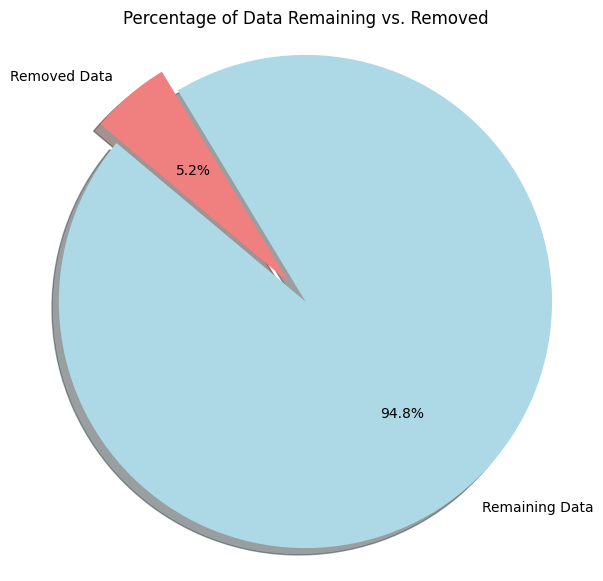

In [ ]:
# Calculate the percentage of data remaining
percentage_remaining = (new_data_size / original_data_size) * 100

# Calculate the percentage of data removed
percentage_removed = 100 - percentage_remaining

# Data to plot
labels = 'Remaining Data', 'Removed Data'
sizes = [percentage_remaining, percentage_removed]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'Remaining Data')

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Data Remaining vs. Removed')
plt.show()

In [ ]:
df.sort_values(by = "host_id")
frequency = df[df.host_id == 4632]
len(frequency)
df['reviews_per_month'].fillna(0, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Print the median price per neighbourhood for every column
df.groupby('neighbourhood_group').price.mean()

# Now calculate the median price per neighbourhood group
median_price_per_neighbourhood = df_no_outliers.groupby('neighbourhood_group')['price'].median()
print(median_price_per_neighbourhood)

neighbourhood_group
Bronx             68.0
Brooklyn          90.0
Manhattan        135.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64


In [ ]:
#Print the median price per neighbourhood for every column
df.groupby('neighbourhood').price.mean()
#Print the median price per neighbourhood for every column
df_no_outliers.groupby('neighbourhood').price.mean()

neighbourhood
Allerton            78.756098
Arden Heights       67.250000
Arrochar            89.500000
Arverne            135.097222
Astoria             97.464531
                      ...    
Willowbrook        249.000000
Windsor Terrace    125.898649
Woodhaven           68.279070
Woodlawn            63.200000
Woodside            78.782609
Name: price, Length: 219, dtype: float64

In [ ]:
df.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])
df_no_outliers.groupby('neighbourhood_group').price.agg(['mean', 'min', 'max'])

,mean,min,max
neighbourhood_group,,,
Bronx,80.327019,30,325
Brooklyn,106.614371,30,330
Manhattan,146.248659,30,332
Queens,89.958203,30,325
Staten Island,90.864789,30,300


In [ ]:
df_cleaned = df.dropna()
correlation_matrix_all_data = df_cleaned[['price', 'reviews_per_month', 'availability_365','minimum_nights','calculated_host_listings_count']].corr()
correlation_matrix_all_data

,price,reviews_per_month,availability_365,minimum_nights,calculated_host_listings_count
price,1.000000,-0.054111,0.114692,0.056021,0.150386
reviews_per_month,-0.054111,1.000000,0.171367,-0.221968,-0.047893
availability_365,0.114692,0.171367,1.000000,0.245352,0.230312
minimum_nights,0.056021,-0.221968,0.245352,1.000000,0.324613
calculated_host_listings_count,0.150386,-0.047893,0.230312,0.324613,1.000000


In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'])

# Normalize price column (you could also standardize depending on your need)
df_encoded['price_normalized'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
df_encoded['price_normalized']

0        0.154746
1        0.253576
2        0.156047
3        0.076723
4        0.065020
           ...   
48890    0.052016
48891    0.013004
48892    0.110533
48893    0.032510
48894    0.078023
Name: price_normalized, Length: 47542, dtype: float64

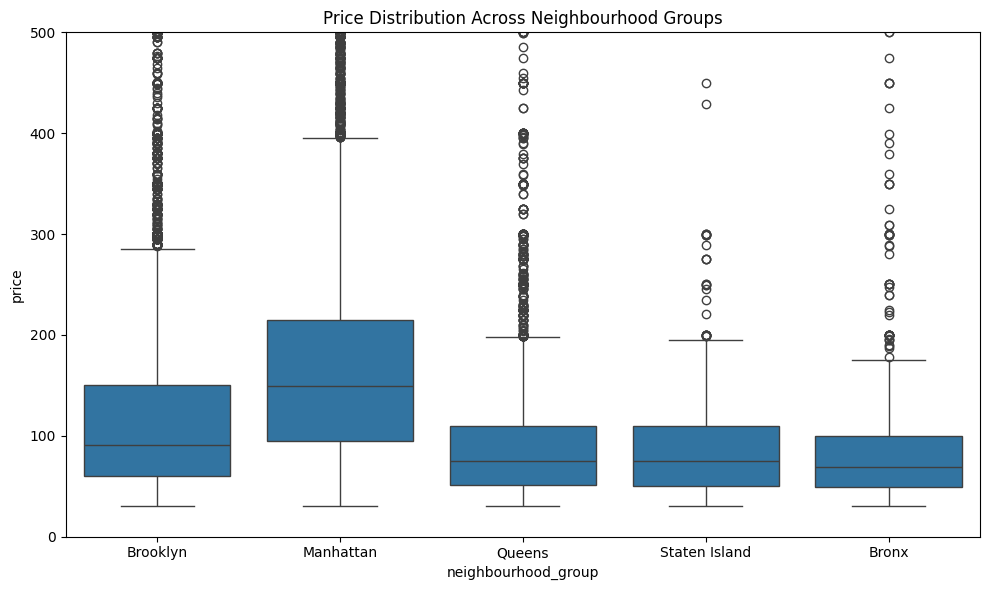

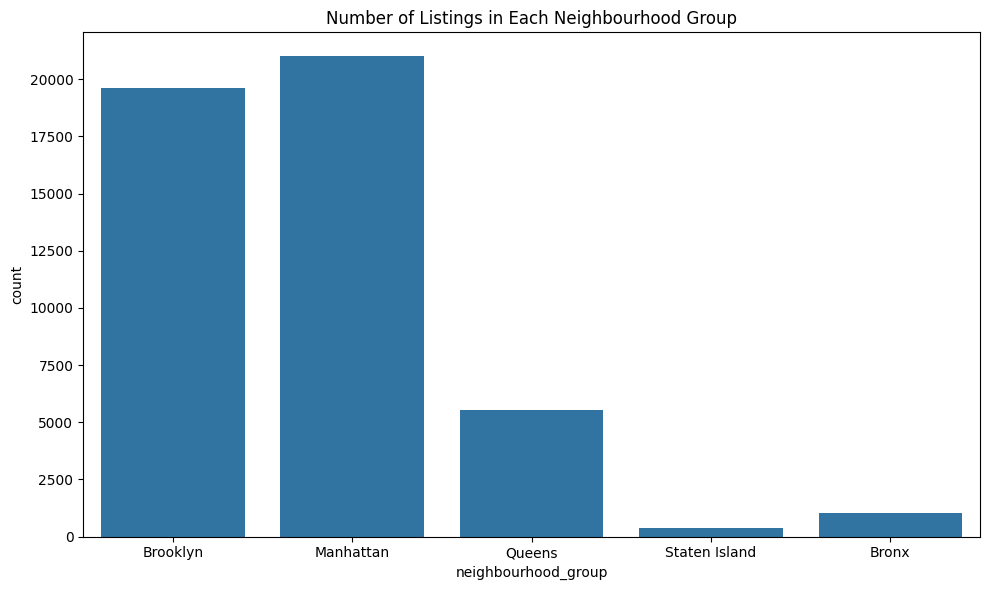

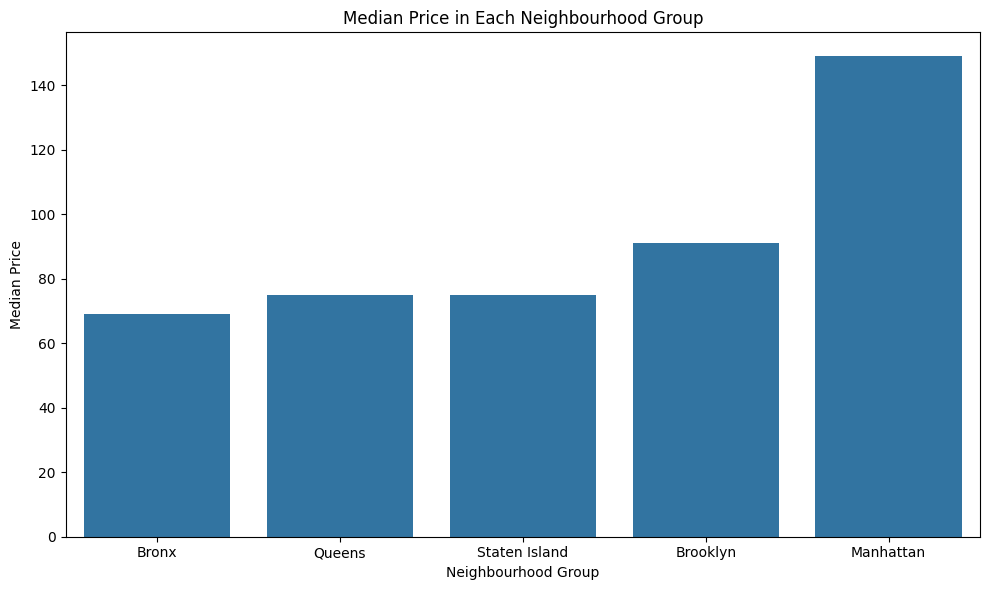

In [ ]:
# Price distribution across neighbourhood groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Price Distribution Across Neighbourhood Groups')
plt.ylim(0, 500)  # Limiting to 500 for better visualization, due to outliers
plt.tight_layout()
plt.show()

# Number of listings in each neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group')
plt.title('Number of Listings in Each Neighbourhood Group')
plt.tight_layout()
plt.show()

median_prices = df.groupby('neighbourhood_group')['price'].median().reset_index()

# Sorting values for better visualization
median_prices = median_prices.sort_values('price')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=median_prices, x='neighbourhood_group', y='price')
plt.title('Median Price in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Median Price')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x795b78f0c3a0> (for post_execute):


KeyboardInterrupt: 

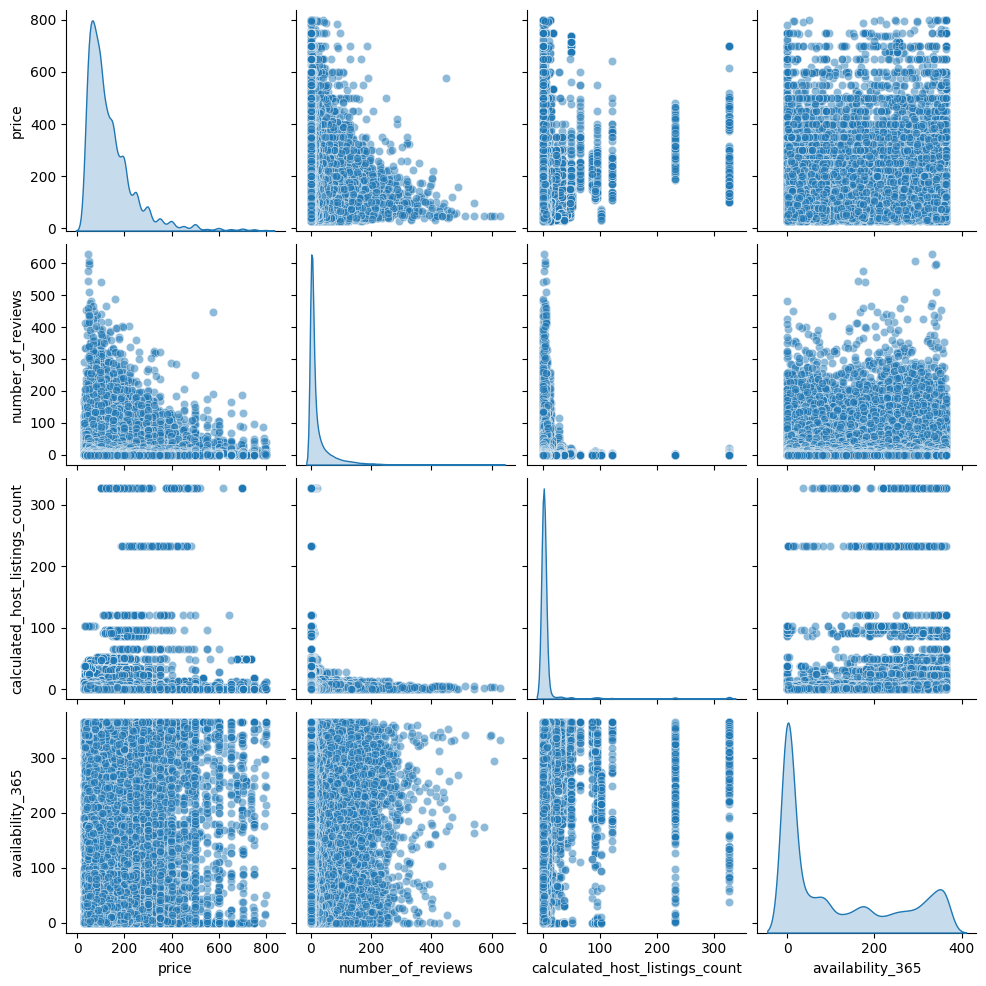

In [ ]:
sns.pairplot(df,
             vars=['price', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365'],
             diag_kind='kde',
             plot_kws={'alpha':0.5})

KeyboardInterrupt: 

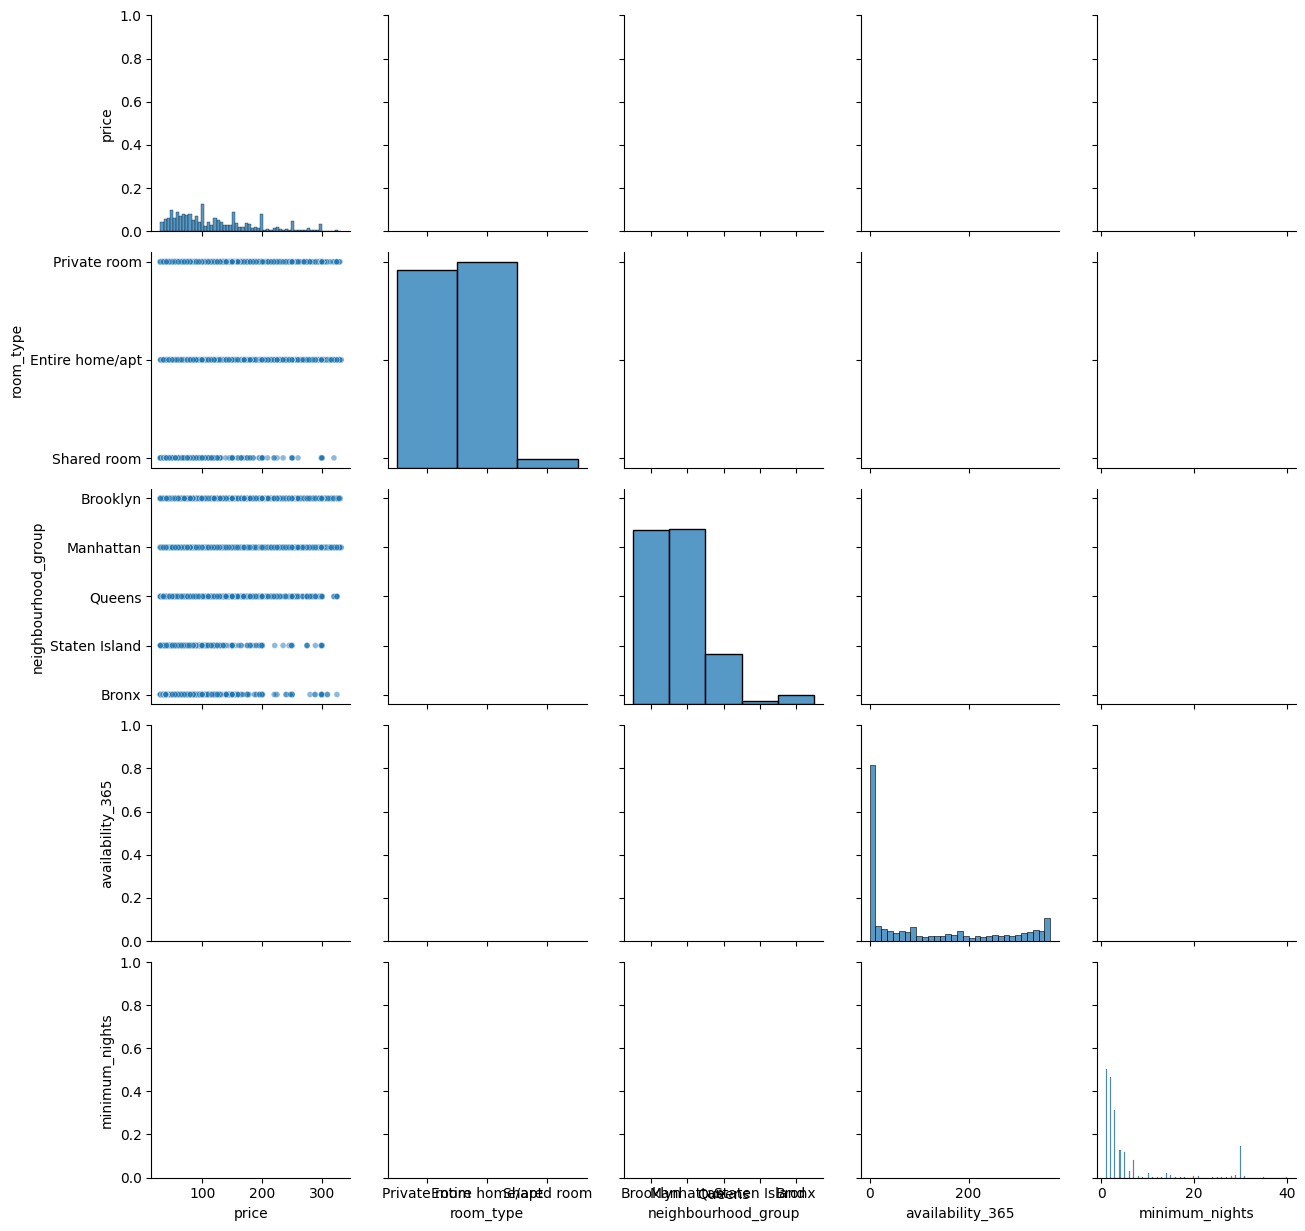

In [ ]:
sns.pairplot(df_no_outliers,
             vars=['price', 'room_type', 'neighbourhood_group', 'availability_365', 'minimum_nights'],
             plot_kws={'alpha':0.5, 'size': 0.1})

In [ ]:

# Plotting the filtered data with a smoothed KDE
plt.figure(figsize=[8,4])

# Plotting the histogram with a KDE
sns.histplot(df['price'], color='g', edgecolor="blue", bins=30, stat='density')
sns.kdeplot(df['price'], color='black', bw_adjust=2, linewidth=2)
plt.title('Target Variable Distribution - Median Value of Airbnb ')
plt.show()

In [ ]:
# Assuming 'df' is  DataFrame filtered for prices < $2000
filtered_df = df[df['price'] < 2000]

# Plotting the filtered data with a smoothed KDE
plt.figure(figsize=[8,4])

# Plotting the histogram with a KDE
sns.histplot(filtered_df['price'], color='g', edgecolor="blue", bins=30, stat='density')
sns.kdeplot(filtered_df['price'], color='black', bw_adjust=2, linewidth=2)
plt.title('Target Variable Distribution - Median Value of Airbnb (Price < $2000)')
plt.show()

In [ ]:
# Assuming 'df' is  DataFrame filtered for prices < $600
filtered_df = df[df['price'] < 600]

# Plotting the filtered data with a smoothed KDE
plt.figure(figsize=[8,4])

# Plotting the histogram with a KDE
sns.histplot(filtered_df['price'], color='g', edgecolor="blue", bins=30, stat='density')
sns.kdeplot(filtered_df['price'], color='black', bw_adjust=2, linewidth=2)
plt.title('Target Variable Distribution - Median Value of Airbnb (Price < $600)')
plt.show()

In [ ]:
#15.transfer strings to dummy variable
room_type=['Entire home/apt','Private room','Shared room']
df_encoded = pd.get_dummies(df,columns=['room_type'], dummy_na=False)
df_encoded1 = df_encoded.iloc[:,[0,2,6,7,8,9,10,12,13,14,15,16,17]]
df_encoded1

#correlation between roomtype and price
corr=df_encoded1.corr()
corr_roomtype=corr.loc[['price'],['room_type_Entire home/apt','room_type_Private room','room_type_Shared room']]
corr_roomtype
plt.figure(figsize=(8,6))
sns.heatmap(corr_roomtype,annot=True,cmap='coolwarm',fmt=".3f")
plt.title('correlation matric of roomtype and price')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

In [ ]:
#correlation between neighbourhood_group and price
uniqu_room_types=df['neighbourhood_group'].unique()
print(uniqu_room_types)

neighbourhood_group =['Brooklyn','Manhattan','Queens','Staten Island','Bronx']
df_encoded2 = pd.get_dummies(df,columns=['neighbourhood_group'], dummy_na=False)
df_encoded21 = df_encoded2.iloc[:,[0,2,5,6,8,9,10,12,13,14,15,16,17,18,19]]
df_encoded21

corr2=df_encoded21.corr()
corr_neighbourhood_group=corr2.loc[['price'],['neighbourhood_group_Bronx','neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan','neighbourhood_group_Queens','neighbourhood_group_Staten Island']]
print(corr_neighbourhood_group)

plt.figure(figsize=(8,6))
sns.heatmap(corr_neighbourhood_group,annot=True,cmap='coolwarm',fmt=".3f")
plt.title('correlation matric of neighbourhood_group and price')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show

In [ ]:
# Perform one-hot encoding for 'neighbourhood_group'
neighbourhood_group_encoded = pd.get_dummies(df['neighbourhood_group'])

# Concatenate encoded neighbourhood groups with price
encoded_data = pd.concat([neighbourhood_group_encoded, df['price']], axis=1)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Neighbourhood Group and Price')

# Invert the y-axis to display 'price' at the top
# plt.gca().invert_yaxis()

plt.show()

In [ ]:
# Perform one-hot encoding for 'room_type' as it is a non-numerical column
room_type_encoded = pd.get_dummies(df['room_type'])

# Concatenate encoded room types with price
encoded_data = pd.concat([room_type_encoded, df['price']], axis=1)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Room Type and Price')
plt.show()

In [ ]:
# Perform one-hot encoding for 'room_type'
room_type_encoded = pd.get_dummies(df['room_type'])

# Concatenate encoded room types with minimum_nights and price
encoded_data = pd.concat([room_type_encoded, df['minimum_nights'], df['price']], axis=1)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))  # Adjust size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Price as the Goal')

# Since 'price' is the goal, make sure it's the last feature in the matrix
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=9)

# One-Hot Encode the categorical variables
room_type_dummies = pd.get_dummies(df['room_type'], prefix='room_type', drop_first=True)
neighbourhood_group_dummies = pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_model = pd.concat([df, room_type_dummies, neighbourhood_group_dummies], axis=1)

# Define the feature columns to include in the model (dummy variables + numeric predictors)
features = list(room_type_dummies.columns) + list(neighbourhood_group_dummies.columns) + ['availability_365', 'minimum_nights']

# Define the target variable
target = 'price'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_model[features], df_model[target], test_size=0.2, random_state=9)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print("Coefficients:")
for i, col in enumerate(features):
    print(f"{col}: {regressor.coef_[i]}")


In [ ]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line for reference
plt.show()

# Histogram of the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Make predictions on the train and test sets
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

# Calculate MSE for the train and test sets
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

# Calculate R^2 for the train and test sets
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Print the results
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

In [ ]:
y=df_encoded2['price']
x=df_encoded2.drop(columns=['price'])

df_encoded.iloc[:,15:18].shape
df_encoded2.iloc[:,14:19].shape
X=pd.concat([df_encoded.iloc[:,15:18],df_encoded2.iloc[:,14:19]],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", x_train.shape)
print("Validation Set Dimensions:", x_test.shape)

In [ ]:
reg=LinearRegression()
reg.fit(x_train, y_train)
y_pred=reg.predict(x_train)
mse=mean_squared_error(y_pred,y_train)
print('mean_squared_error:',mse)

In [ ]:
data = df
# Prepare transformers for preprocessing the data
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

X_transformed = preprocessor.fit_transform(X)

# Check the shape of the transformed data
X_transformed.shape


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict the rental prices on the testing set
y_pred = linear_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

In [ ]:
# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using Random Forest
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

In [ ]:
# Reduce the complexity of the Random Forest model to speed up training
random_forest_model_reduced = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
random_forest_model_reduced.fit(X_train, y_train)

# Predict the rental prices on the testing set using the reduced Random Forest model
y_pred_rf_reduced = random_forest_model_reduced.predict(X_test)

# Evaluate the reduced Random Forest model performance
mse_rf_reduced = mean_squared_error(y_test, y_pred_rf_reduced)
r2_rf_reduced = r2_score(y_test, y_pred_rf_reduced)

mse_rf_reduced, r2_rf_reduced

In [ ]:
# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_gb, r2_gb

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

In [ ]:
# Manually adjust the model with specific parameters
manual_gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
manual_gb_model.fit(X_train, y_train)

# Predict the rental prices on the testing set using the manually tuned model
y_pred_manual_gb = manual_gb_model.predict(X_test)

# Evaluate the manually tuned Gradient Boosting model
mse_manual_gb = mean_squared_error(y_test, y_pred_manual_gb)
r2_manual_gb = r2_score(y_test, y_pred_manual_gb)

mse_manual_gb, r2_manual_gb

In [ ]:
# Load data
data = df

# Assuming 'name' is a column with text data that we want to drop
X = data.drop(['price', 'name'], axis=1)
y = data['price']

# Identify categorical columns (example: 'neighbourhood_group', 'room_type')
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Full pipeline with model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor(random_state=42))])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

In [ ]:
data = df
# Assume 'name' and 'host_name' are non-numeric text columns that we drop
X = data.drop(['price', 'name', 'host_name'], axis=1)
y = data['price']

# Define categorical and numerical columns
categorical_features = ['neighbourhood_group', 'room_type']  # example categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline that includes OneHotEncoder for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Include Polynomial Features in the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')

In [ ]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__subsample': [0.7, 0.9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best model evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Improved MSE: {mse_best}, Improved R²: {r2_best}')

In [ ]:
data = df
X = data.drop('price', axis=1)
y = data['price']

# Categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(random_state=42))])

# Define the space of hyperparameters to search
space = {
    'regressor__n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    'regressor__max_depth': hp.choice('max_depth', [3, 5, 7]),
    'regressor__learning_rate': hp.loguniform('learning_rate', -4, 0),
    'regressor__subsample': hp.uniform('subsample', 0.7, 1.0)
}

# Define the objective function for hyperopt
def objective(params):
    model.set_params(**params)
    score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=3, n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
print("Best: ", best)


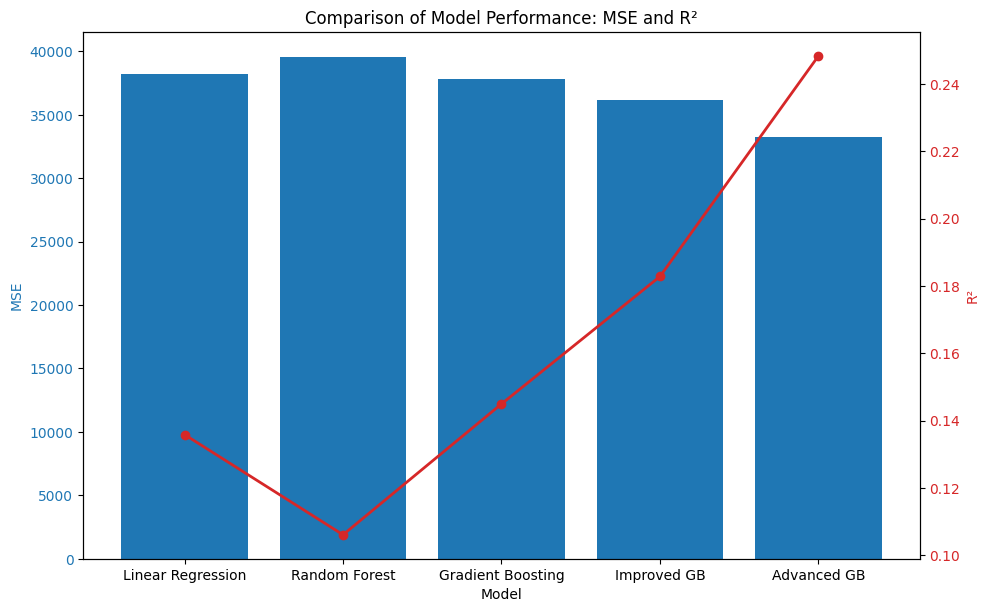

In [ ]:
# Data: MSE and R2 values from different models
data = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Improved GB", "Advanced GB"],
    "MSE": [38228.31490921871, 39544.17502936707, 37825.07873109125, 36150.79257385431, 33253.66502559252],
    "R2": [0.1358535802478561, 0.10610872190342979, 0.1449686851241988, 0.18281572054421857, 0.24830493722407831]
}

da = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for MSE
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(da['Model'], da['MSE'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the R2 values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)  # we already handled the x-label with ax1
ax2.plot(da['Model'], da['R2'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure a nice layout
plt.title('Comparison of Model Performance: MSE and R²')
plt.show()

In [ ]:
data = df_no_outliers
# Handling missing values and encoding categorical variables
data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)  # Assuming no reviews for NaN

# Selecting relevant features
features = data.drop('price', axis=1)
target = data['price']

# Defining numerical and categorical columns
numeric_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocessing the data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape, X_test_prepared.shape

<ipython-input-62-8fd1e3aec32d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)
<ipython-input-62-8fd1e3aec32d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews_per_month'] = data['reviews_per_month'].fillna(0)  # Assuming no reviews for NaN


((36040, 234), (9011, 234))

In [ ]:
# Building the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: predicting price
])
X_train_prepared_dense = X_train_prepared.toarray()
X_test_prepared_dense = X_test_prepared.toarray()
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

# Training the model
# Training the model on the dense version of the training data
history = model.fit(X_train_prepared_dense, y_train, epochs=10, validation_split=0.2, verbose=1)

# Predicting on the dense version of the test set
y_pred = model.predict(X_test_prepared_dense)

# Evaluating the model on the dense version of the test set
test_mse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[0]
test_rmse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[1]
test_r2 = r2_score(y_test, y_pred.flatten())  # Ensure y_pred is the correct shape


test_mse, test_rmse, test_r2



Epoch 1/10
901/901 [==============================] - 8s 7ms/step - loss: 3348.9131 - root_mean_squared_error: 57.8698 - val_loss: 2178.8196 - val_root_mean_squared_error: 46.6778
Epoch 2/10
901/901 [==============================] - 6s 7ms/step - loss: 2111.3188 - root_mean_squared_error: 45.9491 - val_loss: 2245.4944 - val_root_mean_squared_error: 47.3866
Epoch 3/10
901/901 [==============================] - 3s 3ms/step - loss: 2087.3154 - root_mean_squared_error: 45.6871 - val_loss: 2134.2390 - val_root_mean_squared_error: 46.1978
Epoch 4/10
901/901 [==============================] - 3s 3ms/step - loss: 2065.7859 - root_mean_squared_error: 45.4509 - val_loss: 2109.0928 - val_root_mean_squared_error: 45.9249
Epoch 5/10
901/901 [==============================] - 3s 3ms/step - loss: 2045.7703 - root_mean_squared_error: 45.2302 - val_loss: 2097.1965 - val_root_mean_squared_error: 45.7952
Epoch 6/10
901/901 [==============================] - 4s 4ms/step - loss: 2028.0907 - root_mean_squa

(2040.176025390625, 45.16830825805664, 0.559748279261203)

In [ ]:
#feature engineering
data = df_no_outliers1
# Assuming 'room_type' and 'neighbourhood' are categorical, so let's convert them to numerical codes for interaction purposes
data['room_type_code'] = data['room_type'].astype('category').cat.codes
data['neighbourhood_code'] = data['neighbourhood'].astype('category').cat.codes

# Interaction between room type and number of reviews
data['room_type_reviews_interaction'] = data['room_type_code'] * data['number_of_reviews']

# Interaction between neighbourhood and availability
data['neighbourhood_availability_interaction'] = data['neighbourhood_code'] * data['availability_365']

# Polynomial features
# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Example features
selected_features = data[['minimum_nights', 'number_of_reviews']]
poly_features = poly.fit_transform(selected_features)

# Handling feature names based on sklearn version
try:
    # For sklearn 0.24 and later
    poly_feature_names = poly.get_feature_names_out(['minimum_nights', 'number_of_reviews'])
except AttributeError:
    # For older sklearn versions
    poly_feature_names = poly.get_feature_names(['minimum_nights', 'number_of_reviews'])

# Create a DataFrame with the new polynomial features
data_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate this DataFrame with the original data
data = pd.concat([data.reset_index(drop=True), data_poly], axis=1)

data

<ipython-input-65-f9aaa2eb7d28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['room_type_code'] = data['room_type'].astype('category').cat.codes
<ipython-input-65-f9aaa2eb7d28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['neighbourhood_code'] = data['neighbourhood'].astype('category').cat.codes
<ipython-input-65-f9aaa2eb7d28>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_code,room_type_reviews_interaction,neighbourhood_availability_interaction,minimum_nights,number_of_reviews,minimum_nights^2,minimum_nights number_of_reviews,number_of_reviews^2
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,1,107,9,39055,1.0,9.0,1.0,9.0,81.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,0,126,0,44730,1.0,45.0,1.0,45.0,2025.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,1,93,0,33945,3.0,0.0,9.0,0.0,0.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0,41,0,7954,1.0,270.0,1.0,270.0,72900.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0,61,0,0,10.0,9.0,100.0,90.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45046,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,1,13,0,117,2.0,0.0,4.0,0.0,0.0
45047,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,1,28,0,1008,4.0,0.0,16.0,0.0,0.0
45048,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,0,93,0,2511,10.0,0.0,100.0,0.0,0.0
45049,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,2,94,0,188,1.0,0.0,1.0,0.0,0.0


In [ ]:

# Convert last_review to datetime and handle missing values
data['last_review'] = pd.to_datetime(data['last_review'])
data['days_since_last_review'] = (pd.to_datetime('today') - data['last_review']).dt.days

# Month or year of the last review
data['last_review_month'] = data['last_review'].dt.month
data['last_review_year'] = data['last_review'].dt.year

# Number of words in the name
data['name_length'] = data['name'].apply(lambda x: len(str(x).split()))

# Merging average price by neighbourhood
avg_price_neighbourhood = data.groupby('neighbourhood')['price'].mean().rename('avg_price_neighbourhood')
avg_price_neighbourhood_df = avg_price_neighbourhood.reset_index()
avg_price_neighbourhood_df.columns = ['neighbourhood', 'avg_price_neighbourhood']  # Ensure this matches the number of columns
data = data.merge(avg_price_neighbourhood_df, on='neighbourhood', how='left', suffixes=('', '_mean'))
print(data.shape)  # Check if the merge was correct

# Calculating average minimum nights by room type
avg_min_nights_room = data.groupby('room_type')['minimum_nights'].mean()

# Convert the Series to a DataFrame for easier merging
avg_min_nights_room_df = avg_min_nights_room.reset_index()
avg_min_nights_room_df = avg_min_nights_room_df.iloc[:,[0,1]]
# Verify the correct operation by printing the DataFrame
print(avg_min_nights_room_df.head())

# There should only be two columns here, let's rename them correctly
avg_min_nights_room_df.columns = ['room_type', 'avg_min_nights_room']

# Merging this DataFrame with the main DataFrame
data = data.merge(avg_min_nights_room_df, on='room_type', how='left')


# Display the first few rows of the modified DataFrame to verify changes
data.head()

KeyError: 'last_review'

In [ ]:
# Assuming you've added some new features such as interactions and polynomial features
new_numeric_features = ['room_type_reviews_interaction', 'neighbourhood_availability_interaction',
                        'avg_min_nights_room', 'avg_price_neighbourhood', 'days_since_last_review',
                        'last_review_month', 'last_review_year', 'name_length', 'has_keyword_luxury']
new_numeric_features.extend([col for col in data.columns if 'poly' in col])  # Include polynomial features

# Update the list of numeric and categorical features
numeric_features.extend(new_numeric_features)  # Add new numeric features to the list

# Define categorical features: Check if any new categorical features were added or adjust as necessary
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
print(data.columns)  # This will show you all column names
print(data.columns.duplicated())  # This will return a boolean array indicating which column names are duplicates

print(data[['minimum_nights', 'number_of_reviews']].head())
is_duplicated = data.columns.duplicated(keep='last')
# Drop the original duplicates, keeping the last occurrence
data = data.loc[:, ~is_duplicated]
# Selecting relevant features (excluding 'price' and including new features)
features = data.drop('price', axis=1)
target = data['price']
numeric_features = [col for col in numeric_features if col in X_train.columns]
categorical_features = [col for col in categorical_features if col in X_train.columns]
if 'avg_min_nights_room' not in numeric_features:
    numeric_features.append('avg_min_nights_room')
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocessing the data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Checking the shapes of the prepared data
X_train_prepared.shape, X_test_prepared.shape

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_code', 'neighbourhood_code',
       'room_type_reviews_interaction',
       'neighbourhood_availability_interaction', 'minimum_nights',
       'number_of_reviews', 'minimum_nights^2',
       'minimum_nights number_of_reviews', 'number_of_reviews^2'],
      dtype='object')
[False False False False False False False False False False False False
 False False False  True  True False False False]
   minimum_nights  minimum_nights  number_of_reviews  number_of_reviews
0               1             1.0                  9                9.0
1               1             1.0                 45               45.0
2               3             3.0                  0                0.0
3               1             1.0                270              270.0
4   

ValueError: A given column is not a column of the dataframe

In [ ]:
# Building the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: predicting price
])
X_train_prepared_dense = X_train_prepared.toarray()
X_test_prepared_dense = X_test_prepared.toarray()
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

# Training the model
# Training the model on the dense version of the training data
history = model.fit(X_train_prepared_dense, y_train, epochs=10, validation_split=0.2, verbose=1)

# Predicting on the dense version of the test set
y_pred = model.predict(X_test_prepared_dense)

# Evaluating the model on the dense version of the test set
test_mse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[0]
test_rmse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[1]
test_r2 = r2_score(y_test, y_pred.flatten())  # Ensure y_pred is the correct shape


test_mse, test_rmse, test_r2


Epoch 1/10
901/901 [==============================] - 6s 5ms/step - loss: 3651.1748 - root_mean_squared_error: 60.4250 - val_loss: 2149.0615 - val_root_mean_squared_error: 46.3580
Epoch 2/10
901/901 [==============================] - 3s 4ms/step - loss: 2110.6211 - root_mean_squared_error: 45.9415 - val_loss: 2127.1133 - val_root_mean_squared_error: 46.1206
Epoch 3/10
901/901 [==============================] - 3s 4ms/step - loss: 2080.9495 - root_mean_squared_error: 45.6174 - val_loss: 2129.3586 - val_root_mean_squared_error: 46.1450
Epoch 4/10
901/901 [==============================] - 3s 3ms/step - loss: 2058.8635 - root_mean_squared_error: 45.3747 - val_loss: 2128.8638 - val_root_mean_squared_error: 46.1396
Epoch 5/10
901/901 [==============================] - 2s 2ms/step - loss: 2049.5464 - root_mean_squared_error: 45.2719 - val_loss: 2104.5312 - val_root_mean_squared_error: 45.8752
Epoch 6/10
901/901 [==============================] - 3s 3ms/step - loss: 2035.5719 - root_mean_squa

(2064.8876953125, 45.441036224365234, 0.5544154728799298)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_prepared.shape[1],)),  # Increased from 128 to 256
    Dense(128, activation='relu'),  # Added an extra layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer: predicting price
])

X_train_prepared_dense = X_train_prepared.toarray()
X_test_prepared_dense = X_test_prepared.toarray()


# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])

# Training the model
# Training the model on the dense version of the training data
history = model.fit(X_train_prepared_dense, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)


# Predicting on the dense version of the test set
y_pred = model.predict(X_test_prepared_dense)

# Evaluating the model on the dense version of the test set
test_mse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[0]
test_rmse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[1]
test_r2 = r2_score(y_test, y_pred.flatten())  # Ensure y_pred is the correct shape


test_mse, test_rmse, test_r2

Epoch 1/20
451/451 [==============================] - 7s 10ms/step - loss: 3833.9290 - root_mean_squared_error: 61.9187 - val_loss: 2146.4778 - val_root_mean_squared_error: 46.3301
Epoch 2/20
451/451 [==============================] - 6s 13ms/step - loss: 2117.7290 - root_mean_squared_error: 46.0188 - val_loss: 2147.8247 - val_root_mean_squared_error: 46.3446
Epoch 3/20
451/451 [==============================] - 4s 9ms/step - loss: 2084.2769 - root_mean_squared_error: 45.6539 - val_loss: 2113.6938 - val_root_mean_squared_error: 45.9749
Epoch 4/20
451/451 [==============================] - 2s 5ms/step - loss: 2069.9995 - root_mean_squared_error: 45.4972 - val_loss: 2118.3433 - val_root_mean_squared_error: 46.0255
Epoch 5/20
451/451 [==============================] - 2s 5ms/step - loss: 2052.1877 - root_mean_squared_error: 45.3011 - val_loss: 2124.6560 - val_root_mean_squared_error: 46.0940
Epoch 6/20
451/451 [==============================] - 2s 5ms/step - loss: 2027.9143 - root_mean_sq

(2019.616943359375, 44.940147399902344, 0.5641847163656055)

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dropout(0.3),  # Dropout 30% of the neurons
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout 20% of the neurons
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: predicting price
])
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])

# Training the model
history = model.fit(X_train_prepared_dense, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predicting and evaluating
y_pred = model.predict(X_test_prepared_dense)
test_mse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[0]
test_rmse = model.evaluate(X_test_prepared_dense, y_test, verbose=0)[1]
test_r2 = r2_score(y_test, y_pred.flatten())  # Ensure y_pred is the correct shape

(test_mse, test_rmse, test_r2)

Epoch 1/20
901/901 [==============================] - 6s 6ms/step - loss: 3059.0261 - root_mean_squared_error: 55.3085 - val_loss: 2186.0486 - val_root_mean_squared_error: 46.7552
Epoch 2/20
901/901 [==============================] - 7s 8ms/step - loss: 2213.0190 - root_mean_squared_error: 47.0427 - val_loss: 2132.7356 - val_root_mean_squared_error: 46.1815
Epoch 3/20
901/901 [==============================] - 4s 4ms/step - loss: 2202.4670 - root_mean_squared_error: 46.9305 - val_loss: 2187.9993 - val_root_mean_squared_error: 46.7761
Epoch 4/20
901/901 [==============================] - 4s 4ms/step - loss: 2185.0830 - root_mean_squared_error: 46.7449 - val_loss: 2194.1611 - val_root_mean_squared_error: 46.8419
Epoch 5/20
901/901 [==============================] - 5s 6ms/step - loss: 2160.8247 - root_mean_squared_error: 46.4847 - val_loss: 2113.2629 - val_root_mean_squared_error: 45.9702
Epoch 6/20
901/901 [==============================] - 4s 4ms/step - loss: 2150.7532 - root_mean_squa

(2071.30517578125, 45.511592864990234, 0.5530307014221238)

In [ ]:
# Data: MSE and R2 values from different models
data = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "Improved GB", "Advanced GB","GridSearchCV", "Neural Network"],
    "MSE": [6281.556536958027, 5576.590502974027, 5707.3894933221, 5692.158578523026, 5541.340002015362,5238.639461032996, 2040.176025390625],
    "R2": [0.406597060546814, 0.4731934390589694, 0.46083718549452357, 0.4622760119317537, 0.47652346574311966,0.5051188289681703, 0.559748279261203]

}
df = pd.DataFrame(data)


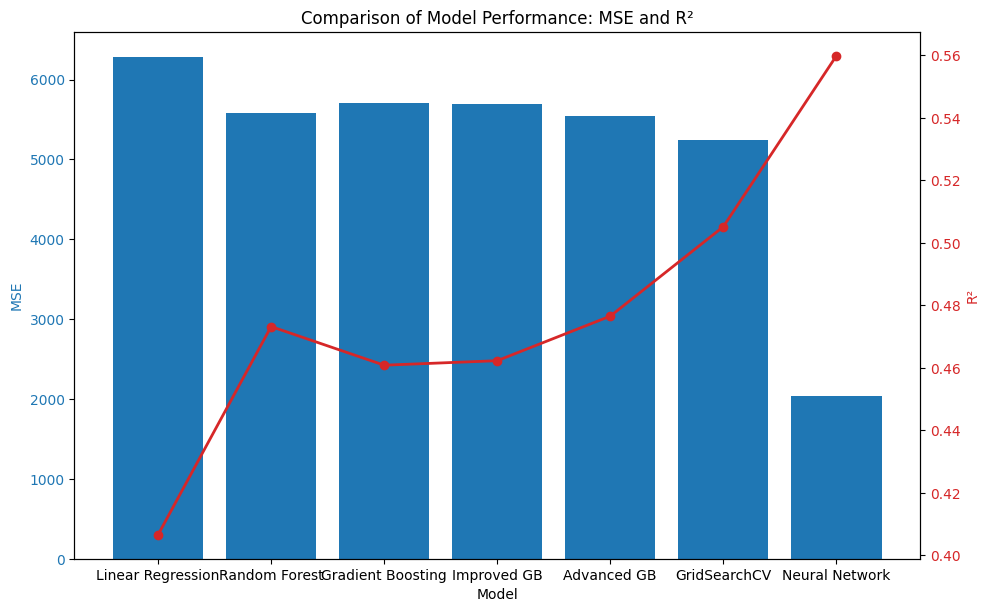

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for MSE
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(df['Model'], df['MSE'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin axis for the R2 values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R²', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Model'], df['R2'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure a nice layout
plt.title('Comparison of Model Performance: MSE and R²')
plt.show()
